## 1. Perceptron nguyên thuỷ(Binary classifier)
<img src="images/perceptron.png" alt="perceptron" width="900">

1 Perceptron có thể giải quyết được các vấn đề đơn giản như classification,..


Được giới thiệu bởi Frank Rosenblatt năm 1957



### Xây dựng 1 perceptron, 2 ngõ vào, 1 bias, 1 output với các trọng số ngẫu nhiên
- Kiểm tra dấu của ngõ ra trên R2
- Thay đổi trọng số và kiểm tra sự thay đổi của dấu trên R2


In [1]:
import numpy as np
import matplotlib.pyplot as plt

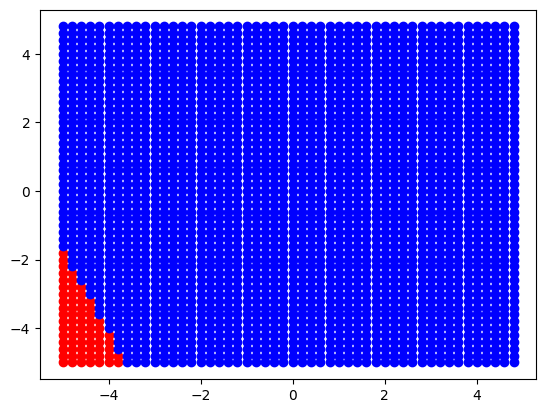

In [2]:

w = np.random.random((3,1)) -.5
def perceptron(x,w):
    xx=np.vstack((np.array([[1]]),x))
    y=w.T @ xx  # @ là tích vô hướng(dot produce)
    if y>0:
        return 1
    else:
        return 0

for x1 in np.arange(-5,5,.2):
    for x2 in np.arange(-5,5,.2):
        
        x = np.array([[x1,x2]]) # Thêm ngoặc để chuyển vị 
        x=x.T #Chuyển vị ma trận X

        a = perceptron(x,w)
        if a==1:
            plt.plot(x1,x2,'bo')
        else:
            plt.plot(x1,x2,'ro')


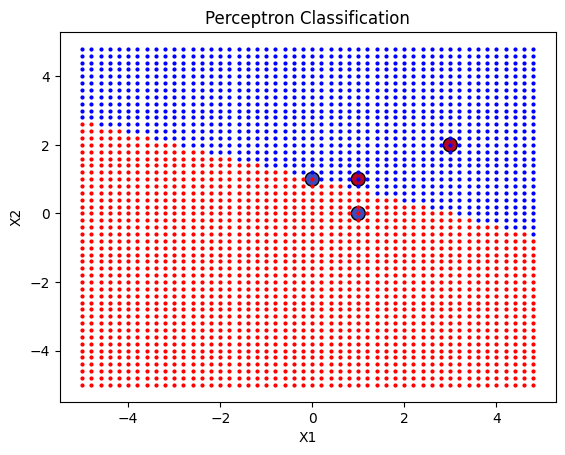

In [10]:
# Dữ liệu huấn luyện
X_train = np.array([[1, 0], [0, 1], [1, 1], [3, 2]])  # 4 điểm dữ liệu
y_train = np.array([0, 0, 1, 1])  # Nhãn mong muốn

# Thêm bias vào X_train
X_train_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))  # Thêm cột 1 cho bias

# Hàm huấn luyện Perceptron
def train_perceptron(X_train, y_train, w, learning_rate =0.1, epochs=100):
    for epoch in range(epochs):
        for i in range(X_train.shape[0]):
            x = X_train[i].reshape(-1, 1)  # Chuyển đổi x thành cột vector
            y_pred = perceptron(x[1:], w)  # Bỏ bias khi truyền vào hàm perceptron
            if y_pred != y_train[i]:  # Cập nhật trọng số khi phân loại sai
                w = w + learning_rate*(y_train[i] - y_pred) * x
    return w

# Huấn luyện Perceptron
w = train_perceptron(X_train_bias, y_train, w)

# Vẽ đồ thị phân loại
for x1 in np.arange(-5, 5, 0.2):
    for x2 in np.arange(-5, 5, 0.2):
        x = np.array([[x1, x2]])  # Tạo điểm dữ liệu
        x = x.T  # Chuyển vị ma trận x
        a = perceptron(x, w)
        if a == 1:
            plt.plot(x1, x2, 'bo', markersize=2)  # Điểm lớp 1
        else:
            plt.plot(x1, x2, 'ro', markersize=2)  # Điểm lớp 0

# Vẽ các điểm huấn luyện
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='o', edgecolor='k', s=100)
plt.title('Perceptron Classification')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()